In [2]:
import pandas as pd
import ujson

Read the data in from json format and create a `pandas` dataframe

In [12]:
data = ujson.load(open('./monthly_energy.json'))['response']['data']

df = pd.DataFrame(data)
df

,period,stateid,stateDescription,sectorid,sectorName,price,price-units
0,2023-08,MA,Massachusetts,ALL,all sectors,22.31,cents per kilowatthour
1,2023-08,MA,Massachusetts,TRA,transportation,6.75,cents per kilowatthour
2,2023-08,MA,Massachusetts,RES,residential,27.83,cents per kilowatthour
3,2023-08,MA,Massachusetts,OTH,other,NaN,cents per kilowatthour
4,2023-08,MA,Massachusetts,IND,industrial,17.74,cents per kilowatthour
...,...,...,...,...,...,...,...
1627,2001-01,MA,Massachusetts,COM,commercial,10.53,cents per kilowatthour
1628,2001-01,MA,Massachusetts,IND,industrial,9.32,cents per kilowatthour
1629,2001-01,MA,Massachusetts,OTH,other,14.10,cents per kilowatthour
1630,2001-01,MA,Massachusetts,RES,residential,11.86,cents per kilowatthour


We want the data from oldest to newest, so we resort it

In [13]:
df = df.reindex(index=df.index[::-1])
df

,period,stateid,stateDescription,sectorid,sectorName,price,price-units
1631,2001-01,MA,Massachusetts,TRA,transportation,NaN,cents per kilowatthour
1630,2001-01,MA,Massachusetts,RES,residential,11.86,cents per kilowatthour
1629,2001-01,MA,Massachusetts,OTH,other,14.10,cents per kilowatthour
1628,2001-01,MA,Massachusetts,IND,industrial,9.32,cents per kilowatthour
1627,2001-01,MA,Massachusetts,COM,commercial,10.53,cents per kilowatthour
...,...,...,...,...,...,...,...
4,2023-08,MA,Massachusetts,IND,industrial,17.74,cents per kilowatthour
3,2023-08,MA,Massachusetts,OTH,other,NaN,cents per kilowatthour
2,2023-08,MA,Massachusetts,RES,residential,27.83,cents per kilowatthour
1,2023-08,MA,Massachusetts,TRA,transportation,6.75,cents per kilowatthour


Now we can do whatever we want with it, like plot residential energy price over time

<Axes: title={'center': 'Residential Energy Price (cents/kWh)'}, xlabel='period'>

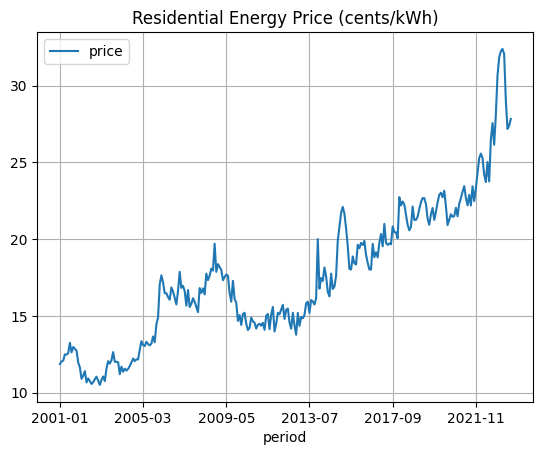

In [16]:
residential = df[df['sectorid'] == 'RES']
residential.plot(x='period', y='price', title='Residential Energy Price (cents/kWh)', grid=True)

Or if we want the data in CSV format, we can save it

In [17]:
df.to_csv('./monthly_energy.csv', index=False)